In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataframe
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# check the size of dataframe
df.shape

(1460, 81)

In [4]:
#check the types of columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# No. of columns with null values
print("No. of columns wih null values = ", (df.isnull().sum()>0).sum())

No. of columns wih null values =  19


In [6]:
missing_data = df.isnull().sum()[df.isnull().sum()>0]
missing_data

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
df_null = pd.DataFrame(missing_data, columns = ["Null_count"]).reset_index()
pd.DataFrame.rename(df_null, columns={'index':'column_name'}, inplace = True)
df_null["Percent_null"]= df_null.Null_count*100/df.shape[0]
df_null.sort_values(by="Percent_null", ascending = False)

,column_name,Null_count,Percent_null
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945
14,GarageQual,81,5.547945


In [8]:
# delete columns with missing values > 30 %
delete_cols = df_null[df_null["Percent_null"]>30].column_name.tolist()
delete_cols

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [9]:
df.drop(delete_cols, axis =1, inplace = True)
df.shape

(1460, 76)

In [10]:
# Lot frontage null values = 17%
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [11]:
# fill na in lot frontage using mode
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.mode()[0])
df.LotFrontage.isnull().sum()

0

In [12]:
# GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond all have null %  = 5.5%
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [13]:
# fill na in GarageType using mode
df.GarageType = df.GarageType.fillna(df.GarageType.mode()[0])
df.GarageType.isnull().sum()

0

In [14]:
df.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [15]:
# fill na in GarageYrBlt using mode
df.GarageYrBlt = df.GarageYrBlt.fillna(df.GarageYrBlt.mode()[0])
df.GarageYrBlt.isnull().sum()

0

In [16]:
df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [17]:
# fill na in GarageFinish using mode
df.GarageFinish = df.GarageFinish.fillna(df.GarageFinish.mode()[0])
df.GarageFinish.isnull().sum()

0

In [18]:
df.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [19]:
# fill na in GarageQual using mode
df.GarageQual = df.GarageQual.fillna(df.GarageQual.mode()[0])
df.GarageQual.isnull().sum()

0

In [20]:
df.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [21]:
# fill na in GarageCond using mode
df.GarageCond = df.GarageCond.fillna(df.GarageCond.mode()[0])
df.GarageCond.isnull().sum()

0

In [22]:
# BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual = 2.6 %

In [23]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [24]:
# fill na in BsmtExposure using mode
df.BsmtExposure = df.BsmtExposure.fillna(df.BsmtExposure.mode()[0])
df.BsmtExposure.isnull().sum()

0

In [25]:
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [26]:
# fill na in BsmtFinType2 using mode
df.BsmtFinType2 = df.BsmtFinType2.fillna(df.BsmtFinType2.mode()[0])
df.BsmtFinType2.isnull().sum()

0

In [27]:
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [28]:
# fill na in BsmtFinType1 using mode
df.BsmtFinType1 = df.BsmtFinType1.fillna(df.BsmtFinType1.mode()[0])
df.BsmtFinType1.isnull().sum()

0

In [29]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [30]:
# fill na in BsmtCond using mode
df.BsmtCond = df.BsmtCond.fillna(df.BsmtCond.mode()[0])
df.BsmtCond.isnull().sum()

0

In [31]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [32]:
# fill na in BsmtQual using mode
df.BsmtQual = df.BsmtQual.fillna(df.BsmtQual.mode()[0])
df.BsmtQual.isnull().sum()

0

In [33]:
#MasVnrArea,MasVnrType = 0.54% , Electrical = 0.06%

In [34]:
df.MasVnrArea.value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [35]:
# fill na in MasVnrArea using mode
df.MasVnrArea = df.MasVnrArea.fillna(df.MasVnrArea.mode()[0])
df.MasVnrArea.isnull().sum()

0

In [36]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [37]:
# fill na in MasVnrType using mode
df.MasVnrType = df.MasVnrType.fillna(df.MasVnrType.mode()[0])
df.MasVnrType.isnull().sum()

0

In [38]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [39]:
# fill na in Electrical using mode
df.Electrical = df.Electrical.fillna(df.Electrical.mode()[0])
df.Electrical.isnull().sum()

0

In [40]:
# total number of null values
print((df.isnull().sum()).sum())

0


In [41]:
df.shape

(1460, 76)

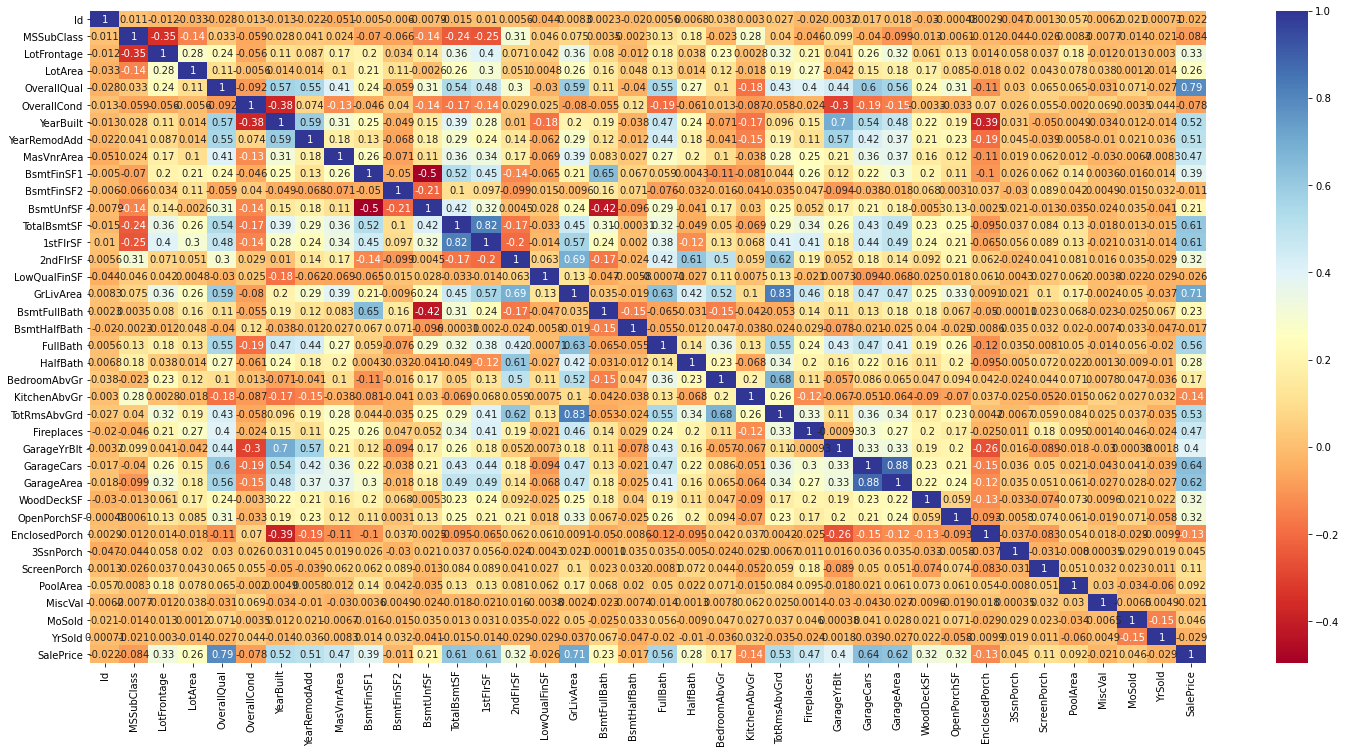

In [42]:
plt.figure(figsize = [25,12])
sns.heatmap(df.corr(),cmap = 'RdYlBu', annot = True)
plt.show()

### Observation:
    1. GrLivArea - TotRmsAbvGrd has correlation of 0.83. So we will remove 'TotRmsAbvGrd' as it has less 
       correlation with price.
    2. GarageArea - GarageCars has correlation of 0.88. So we will remove 'GarageArea'.

In [43]:
new_delete = ['TotRmsAbvGrd','GarageArea']

In [44]:
df = df.drop(new_delete, 1)
df.shape

(1460, 74)

<AxesSubplot:>

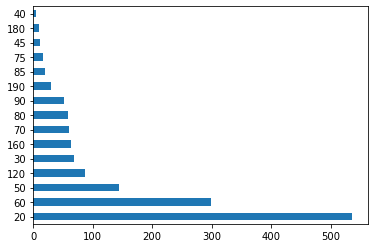

In [45]:
# MSsubclass # Categorical variable
df.MSSubClass.value_counts().plot.barh()

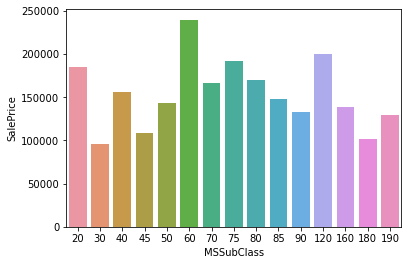

In [46]:
sns.barplot(data = df, x = 'MSSubClass', y = 'SalePrice', ci = None)
plt.show()

In [47]:
# MSSubclass all categories has nearly general impact on sales price. Only '60' has high effect. 

<AxesSubplot:>

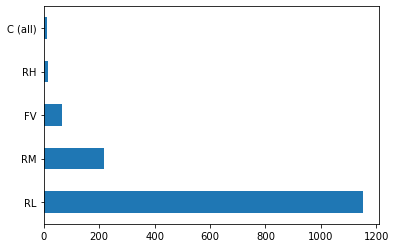

In [48]:
#MSZoning # Categorical variable
df.MSZoning.value_counts().plot.barh()

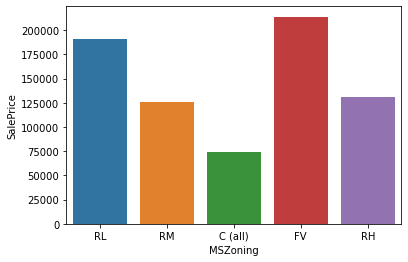

In [49]:
sns.barplot(data = df, x = 'MSZoning', y='SalePrice', ci =None)
plt.show()

In [50]:
# RL & FV zones have comparitively higher impact on sale price than other categories.

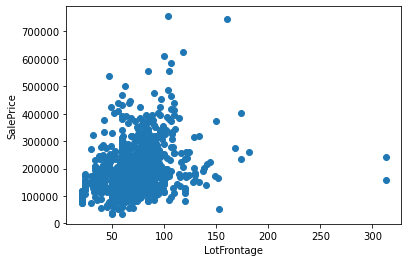

In [51]:
plt.scatter(df.LotFrontage, df.SalePrice)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.show()

In [52]:
# Lot frontage has no specific correlation with sale price

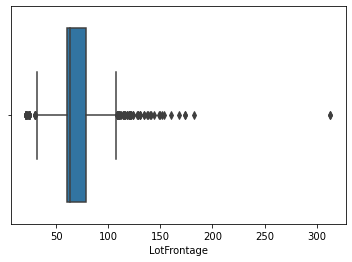

In [53]:
sns.boxplot(data = df, x='LotFrontage')
plt.show()

In [54]:
# whisker plot suggests that there are very few outliers

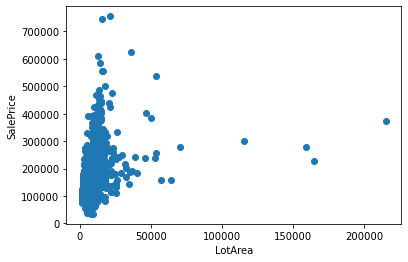

In [55]:
plt.scatter(df.LotArea,df.SalePrice)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

In [56]:
# Lot area values greater than 20000 are very unlikely

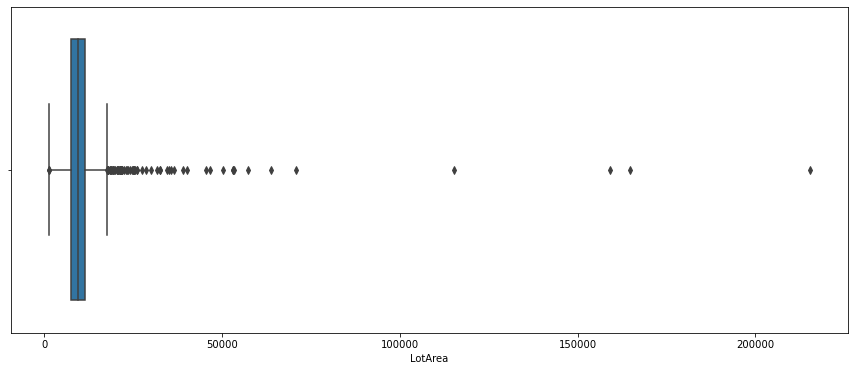

In [57]:
plt.figure(figsize=[15,6])
sns.boxplot(data = df, x = 'LotArea')
plt.show()

In [58]:
df[df.LotArea>20000].shape

(53, 74)

In [59]:
# Applying elimination of records above 20000 Lotarea

In [60]:
df = df[~(df.LotArea > 20000)]

In [61]:
df.shape

(1407, 74)

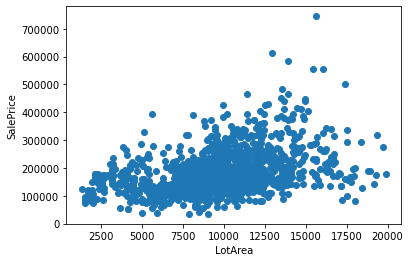

In [62]:
plt.scatter(df.LotArea,df.SalePrice)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

In [63]:
# Increase in Lot area there is little increase in price

In [64]:
#Street # Categorical Feature
df.Street.value_counts()

Pave    1403
Grvl       4
Name: Street, dtype: int64

In [65]:
# Almost all properties from train data are located at Pave street so it better to drop this column

In [66]:
df = df.drop('Street', 1)

In [67]:
df.shape

(1407, 73)

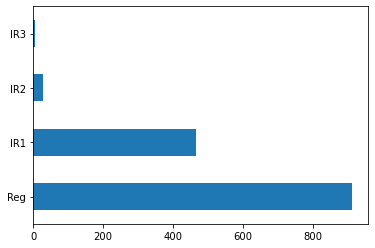

In [68]:
df.LotShape.value_counts().plot.barh()
plt.show()

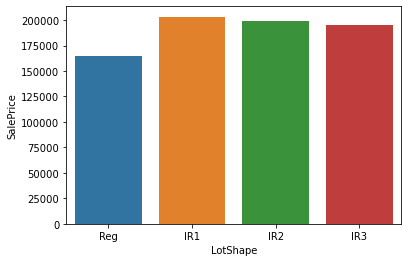

In [69]:
sns.barplot(data=df, x='LotShape',y='SalePrice',ci = None)
plt.show()

In [70]:
# Lot shapes IR1, IR2, IR3 has more effect on price than Reg.

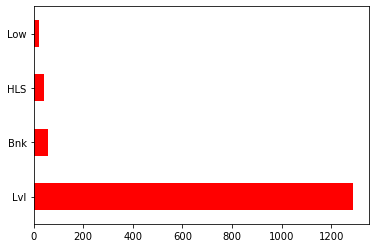

In [71]:
df.LandContour.value_counts().plot.barh(color = 'r')
plt.show()

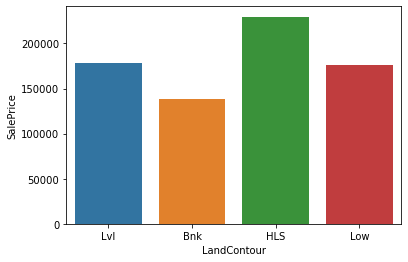

In [72]:
sns.barplot(data=df, x='LandContour',y='SalePrice',ci = None)
plt.show()

In [73]:
# HLS has relatively higher effect on price

In [74]:
df.Utilities.value_counts()

AllPub    1406
NoSeWa       1
Name: Utilities, dtype: int64

In [75]:
# Almost all data has Allpub utility so better to drop 'Utilities'

In [76]:
df = df.drop('Utilities',1)

In [77]:
df.shape

(1407, 72)

In [78]:
df.LotConfig.value_counts()

Inside     1025
Corner      255
CulDSac      78
FR2          45
FR3           4
Name: LotConfig, dtype: int64

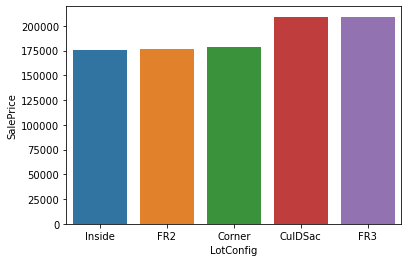

In [79]:
sns.barplot(data=df, x='LotConfig',y='SalePrice',ci = None)
plt.show()

In [80]:
# CulDSac & FR3 has relatively higher impact on price

In [81]:
df.LandSlope.value_counts()

Gtl    1350
Mod      54
Sev       3
Name: LandSlope, dtype: int64

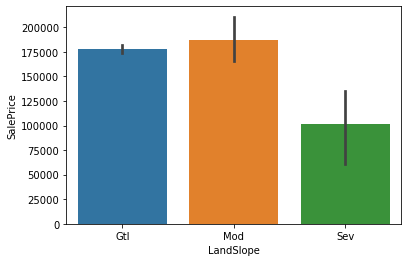

In [82]:
sns.barplot(data = df, x='LandSlope', y='SalePrice')
plt.show()

In [83]:
# Gtl, Mod has more effect on sale price also Sev has very low data count

In [84]:
df.Neighborhood.value_counts()

NAmes      222
CollgCr    150
OldTown    112
Edwards     97
Somerst     85
NridgHt     76
Gilbert     74
Sawyer      72
NWAmes      71
SawyerW     59
BrkSide     57
Crawfor     47
Mitchel     43
NoRidge     37
IDOTRR      37
Timber      33
SWISU       25
StoneBr     24
Blmngtn     17
MeadowV     17
BrDale      16
ClearCr     15
Veenker     10
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

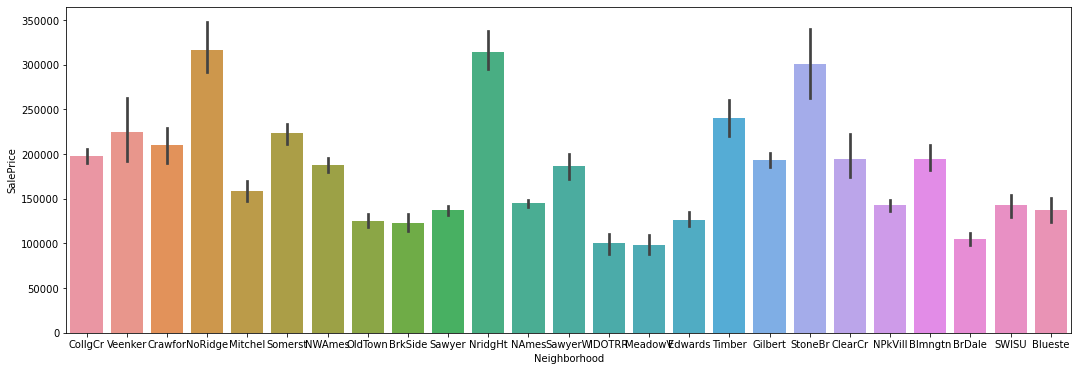

In [85]:
plt.figure(figsize=[18,6])
sns.barplot(data = df, x = 'Neighborhood',y = 'SalePrice')
plt.show()

In [86]:
# drop id column
df.drop("Id",axis =1, inplace = True)

In [87]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [88]:
dummy_var_list = df.select_dtypes(exclude=["float64","int64"]).columns.to_list()

In [89]:
len(dummy_var_list)

36

In [90]:
# Create dummy variables
dummy_list = pd.get_dummies(df[dummy_var_list],drop_first = True)
dummy_list.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [91]:
df.drop(dummy_var_list,axis = 1, inplace = True)
df.shape

(1407, 35)

In [92]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1407 non-null   int64  
 1   LotFrontage    1407 non-null   float64
 2   LotArea        1407 non-null   int64  
 3   OverallQual    1407 non-null   int64  
 4   OverallCond    1407 non-null   int64  
 5   YearBuilt      1407 non-null   int64  
 6   YearRemodAdd   1407 non-null   int64  
 7   MasVnrArea     1407 non-null   float64
 8   BsmtFinSF1     1407 non-null   int64  
 9   BsmtFinSF2     1407 non-null   int64  
 10  BsmtUnfSF      1407 non-null   int64  
 11  TotalBsmtSF    1407 non-null   int64  
 12  1stFlrSF       1407 non-null   int64  
 13  2ndFlrSF       1407 non-null   int64  
 14  LowQualFinSF   1407 non-null   int64  
 15  GrLivArea      1407 non-null   int64  
 16  BsmtFullBath   1407 non-null   int64  
 17  BsmtHalfBath   1407 non-null   int64  
 18  FullBath

In [94]:
# add dummy variables to data frame

df = pd.concat([df,dummy_list], axis =1)
df.shape

(1407, 226)

In [95]:
# X & y
y_train = df.pop('SalePrice')
X_train = df

### First will build the model for top 50 variables. Then after examining p-values & VIF decide to eliminate unwanted columns.

In [96]:
### RFE to select top 50 columns

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [97]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)
rfe = rfe.fit(X_train,y_train)

In [98]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 158),
 ('LotFrontage', False, 153),
 ('LotArea', False, 174),
 ('OverallQual', True, 1),
 ('OverallCond', False, 69),
 ('YearBuilt', False, 156),
 ('YearRemodAdd', False, 154),
 ('MasVnrArea', False, 172),
 ('BsmtFinSF1', False, 165),
 ('BsmtFinSF2', False, 173),
 ('BsmtUnfSF', False, 175),
 ('TotalBsmtSF', False, 166),
 ('1stFlrSF', False, 161),
 ('2ndFlrSF', False, 162),
 ('LowQualFinSF', False, 170),
 ('GrLivArea', False, 157),
 ('BsmtFullBath', False, 14),
 ('BsmtHalfBath', False, 131),
 ('FullBath', True, 1),
 ('HalfBath', False, 11),
 ('BedroomAbvGr', False, 94),
 ('KitchenAbvGr', False, 145),
 ('Fireplaces', False, 20),
 ('GarageYrBlt', False, 160),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 171),
 ('OpenPorchSF', False, 167),
 ('EnclosedPorch', False, 169),
 ('3SsnPorch', False, 164),
 ('ScreenPorch', False, 163),
 ('PoolArea', False, 155),
 ('MiscVal', False, 176),
 ('MoSold', False, 147),
 ('YrSold', False, 142),
 ('MSZoning_FV', True, 1),
 ('MSZo

In [99]:
# columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['OverallQual', 'FullBath', 'GarageCars', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'RoofStyle_Shed', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Exterior2nd_ImStucc', 'Exterior2nd_Wd Shng',
       'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_Unf',
       'HeatingQC_Po', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Maj2', 'Functional_Sev', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_

In [100]:
# Use statsmodel
import statsmodels.api as sm

In [101]:
X_train_rfe = X_train[cols]
# Add constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create model
mlr = sm.OLS(y_train,X_train_sm)

# fit the model
mlr_model= mlr.fit()

In [102]:
# model summary
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     165.7
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:43:29   Log-Likelihood:                -16436.
No. Observations:                1407   AIC:                         3.297e+04
Df Residuals:                    1357   BIC:                         3.323e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.677e+04 

In [103]:
## VIF Analysis

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Condition2_RRAe,inf
17,RoofStyle_Shed,inf
45,GarageQual_TA,334.84
37,GarageType_Attchd,183.22
5,MSZoning_RL,111.34
41,GarageType_Detchd,74.51
0,OverallQual,67.95
25,ExterQual_TA,39.87
6,MSZoning_RM,22.52
24,ExterQual_Gd,18.11


### Features with high p value and VIF:
    1. Condition2_RRAe
    2. RoofStyle_Shed
    3. GarageQual_TA


### Rebuild he model

In [105]:
X_train_rfe = X_train_rfe.drop(["Condition2_RRAe","RoofStyle_Shed","GarageQual_TA"],1)

In [106]:
# Add constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create  & fit the model
mlr_model1 = sm.OLS(y_train,X_train_sm).fit()


In [107]:
print(mlr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     172.9
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:43:31   Log-Likelihood:                -16436.
No. Observations:                1407   AIC:                         3.297e+04
Df Residuals:                    1359   BIC:                         3.322e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.845e+04 

In [108]:
## VIF analysis
vif = pd.DataFrame()
vif["Features"]= X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
35,GarageType_Attchd,111.01
5,MSZoning_RL,99.44
0,OverallQual,65.97
39,GarageType_Detchd,45.38
23,ExterQual_TA,38.55
6,MSZoning_RM,20.23
32,KitchenQual_TA,17.79
22,ExterQual_Gd,17.70
1,FullBath,17.59
26,BsmtQual_TA,14.63


### Columns with p value more than 0.5
  "GarageCond_Po","GarageCond_Gd","GarageQual_Gd"

In [109]:
X_train_rfe = X_train_rfe.drop(["GarageCond_Po","GarageCond_Gd","GarageQual_Gd"],1)

In [110]:
# Add constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create  & fit the model
mlr_model2 = sm.OLS(y_train,X_train_sm).fit()


In [111]:
print(mlr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     185.0
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:43:33   Log-Likelihood:                -16436.
No. Observations:                1407   AIC:                         3.296e+04
Df Residuals:                    1362   BIC:                         3.320e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.852e+04 

In [112]:
## VIF analysis
vif = pd.DataFrame()
vif["Features"]= X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
35,GarageType_Attchd,110.97
5,MSZoning_RL,99.42
0,OverallQual,65.94
39,GarageType_Detchd,45.35
23,ExterQual_TA,38.54
6,MSZoning_RM,20.23
32,KitchenQual_TA,17.73
22,ExterQual_Gd,17.69
1,FullBath,17.56
26,BsmtQual_TA,14.60


In [113]:
### Columns with VIF value greater than 20
["GarageType_Attchd","MSZoning_RL","OverallQual","GarageType_Detchd","ExterQual_TA","MSZoning_RM"]

['GarageType_Attchd',
 'MSZoning_RL',
 'OverallQual',
 'GarageType_Detchd',
 'ExterQual_TA',
 'MSZoning_RM']

In [114]:
X_train_rfe = X_train_rfe.drop(["GarageType_Attchd","MSZoning_RL","OverallQual","GarageType_Detchd","ExterQual_TA","MSZoning_RM"],1)

In [115]:
# Add constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create  & fit the model
mlr_model3 = sm.OLS(y_train,X_train_sm).fit()

print(mlr_model3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     164.4
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:43:34   Log-Likelihood:                -16595.
No. Observations:                1407   AIC:                         3.327e+04
Df Residuals:                    1368   BIC:                         3.347e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.981e+05 

In [116]:
## VIF analysis
vif = pd.DataFrame()
vif["Features"]= X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,FullBath,12.96
28,KitchenQual_TA,11.26
22,BsmtQual_TA,9.53
1,GarageCars,9.32
27,KitchenQual_Gd,8.88
21,BsmtQual_Gd,8.14
19,ExterQual_Gd,3.42
26,KitchenQual_Fa,1.75
24,BsmtFinType1_Unf,1.68
20,BsmtQual_Fa,1.58


### columns with p value more that 0.5
["GarageType_Basment","Condition2_PosN","MSZoning_RH"]

In [117]:
X_train_rfe = X_train_rfe.drop(["GarageType_Basment","Condition2_PosN","MSZoning_RH"],1)

In [118]:
# Add constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create  & fit the model
mlr_model4 = sm.OLS(y_train,X_train_sm).fit()

print(mlr_model4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:43:36   Log-Likelihood:                -16596.
No. Observations:                1407   AIC:                         3.326e+04
Df Residuals:                    1371   BIC:                         3.345e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.983e+05 

In [119]:
## VIF analysis
vif = pd.DataFrame()
vif["Features"]= X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,FullBath,12.89
26,KitchenQual_TA,11.25
20,BsmtQual_TA,9.52
1,GarageCars,9.27
25,KitchenQual_Gd,8.87
19,BsmtQual_Gd,8.13
17,ExterQual_Gd,3.41
24,KitchenQual_Fa,1.75
22,BsmtFinType1_Unf,1.68
18,BsmtQual_Fa,1.58


In [120]:
### Columns with relatively high p value
["Exterior1st_Stone","Functional_Maj2","Functional_Sev","GarageType_CarPort","GarageQual_Po"]

['Exterior1st_Stone',
 'Functional_Maj2',
 'Functional_Sev',
 'GarageType_CarPort',
 'GarageQual_Po']

In [121]:
# remove unnecessary columns
X_train_rfe = X_train_rfe.drop(["Exterior1st_Stone","Functional_Maj2","Functional_Sev","GarageType_CarPort","GarageQual_Po"],1)

# Add constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create  & fit the model
mlr_model5 = sm.OLS(y_train,X_train_sm).fit()

print(mlr_model5.summary())

## VIF analysis
vif = pd.DataFrame()
vif["Features"]= X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     207.9
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:43:36   Log-Likelihood:                -16599.
No. Observations:                1407   AIC:                         3.326e+04
Df Residuals:                    1376   BIC:                         3.342e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.985e+05 

,Features,VIF
0,FullBath,12.85
25,KitchenQual_TA,11.15
19,BsmtQual_TA,9.46
1,GarageCars,9.25
24,KitchenQual_Gd,8.82
18,BsmtQual_Gd,8.10
16,ExterQual_Gd,3.39
23,KitchenQual_Fa,1.73
21,BsmtFinType1_Unf,1.67
17,BsmtQual_Fa,1.53


In [122]:
## Columns with high VIF
["FullBath","KitchenQual_TA"]

['FullBath', 'KitchenQual_TA']

In [123]:
# remove unnecessary columns
X_train_rfe = X_train_rfe.drop(["FullBath","KitchenQual_TA"],1)

# Add constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create  & fit the model
mlr_model6 = sm.OLS(y_train,X_train_sm).fit()

print(mlr_model6.summary())

## VIF analysis
vif = pd.DataFrame()
vif["Features"]= X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     154.5
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:43:37   Log-Likelihood:                -16804.
No. Observations:                1407   AIC:                         3.367e+04
Df Residuals:                    1378   BIC:                         3.382e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.94e+05 

,Features,VIF
0,GarageCars,6.43
17,BsmtQual_Gd,3.86
15,ExterQual_Gd,3.32
23,KitchenQual_Gd,3.06
18,BsmtQual_TA,2.83
20,BsmtFinType1_Unf,1.63
4,Neighborhood_NridgHt,1.44
25,GarageQual_Fa,1.41
26,GarageCond_Fa,1.35
9,BldgType_TwnhsE,1.28


In [ ]:
## Column with high p value = "KitchenQual_Fa"

In [124]:
# remove unnecessary columns
X_train_rfe = X_train_rfe.drop(["KitchenQual_Fa"],1)

# Add constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create  & fit the model
mlr_model7 = sm.OLS(y_train,X_train_sm).fit()

print(mlr_model7.summary())

## VIF analysis
vif = pd.DataFrame()
vif["Features"]= X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     160.2
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:43:37   Log-Likelihood:                -16804.
No. Observations:                1407   AIC:                         3.366e+04
Df Residuals:                    1379   BIC:                         3.381e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.935e+05 

,Features,VIF
0,GarageCars,6.36
17,BsmtQual_Gd,3.82
15,ExterQual_Gd,3.32
22,KitchenQual_Gd,3.05
18,BsmtQual_TA,2.75
20,BsmtFinType1_Unf,1.62
4,Neighborhood_NridgHt,1.44
24,GarageQual_Fa,1.40
25,GarageCond_Fa,1.35
9,BldgType_TwnhsE,1.28


In [ ]:
## Column with high p value = "KitchenQual_Gd"

In [125]:
# remove unnecessary columns
X_train_rfe = X_train_rfe.drop(["KitchenQual_Gd"],1)

# Add constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create  & fit the model
mlr_model8 = sm.OLS(y_train,X_train_sm).fit()

print(mlr_model8.summary())

## VIF analysis
vif = pd.DataFrame()
vif["Features"]= X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:43:38   Log-Likelihood:                -16805.
No. Observations:                1407   AIC:                         3.366e+04
Df Residuals:                    1380   BIC:                         3.380e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.934e+05 

,Features,VIF
0,GarageCars,6.25
17,BsmtQual_Gd,3.69
18,BsmtQual_TA,2.73
15,ExterQual_Gd,2.61
20,BsmtFinType1_Unf,1.62
4,Neighborhood_NridgHt,1.44
23,GarageQual_Fa,1.40
24,GarageCond_Fa,1.35
9,BldgType_TwnhsE,1.28
1,MSZoning_FV,1.23


In [ ]:
## Column with high p value = "GarageQual_Fa"

In [126]:
# remove unnecessary columns
X_train_rfe = X_train_rfe.drop(["GarageQual_Fa"],1)

# Add constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create  & fit the model
mlr_model9 = sm.OLS(y_train,X_train_sm).fit()

print(mlr_model9.summary())

## VIF analysis
vif = pd.DataFrame()
vif["Features"]= X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     172.6
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:43:38   Log-Likelihood:                -16806.
No. Observations:                1407   AIC:                         3.366e+04
Df Residuals:                    1381   BIC:                         3.380e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.931e+05 

,Features,VIF
0,GarageCars,6.24
17,BsmtQual_Gd,3.69
18,BsmtQual_TA,2.72
15,ExterQual_Gd,2.61
20,BsmtFinType1_Unf,1.60
4,Neighborhood_NridgHt,1.44
9,BldgType_TwnhsE,1.28
1,MSZoning_FV,1.23
22,GarageType_BuiltIn,1.18
3,Neighborhood_NoRidge,1.18


In [ ]:
## Column with high VIF = "GarageCars"

In [127]:
# remove unnecessary columns
X_train_rfe = X_train_rfe.drop(["GarageCars"],1)

# Add constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create  & fit the model
mlr_model10 = sm.OLS(y_train,X_train_sm).fit()

print(mlr_model10.summary())
## VIF analysis
vif = pd.DataFrame()
vif["Features"]= X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     140.5
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:43:38   Log-Likelihood:                -16934.
No. Observations:                1407   AIC:                         3.392e+04
Df Residuals:                    1382   BIC:                         3.405e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.563e+05 

,Features,VIF
8,BldgType_TwnhsE,1.28
0,MSZoning_FV,1.22
3,Neighborhood_NridgHt,1.20
21,GarageType_BuiltIn,1.17
2,Neighborhood_NoRidge,1.16
11,Exterior2nd_ImStucc,1.15
18,BsmtExposure_Gd,1.14
10,Exterior1st_ImStucc,1.13
4,Neighborhood_StoneBr,1.11
15,BsmtQual_Fa,1.10


In [ ]:
## Columns with high p value = "HeatingQC_Po"

In [128]:
# remove unnecessary columns
X_train_rfe = X_train_rfe.drop(["HeatingQC_Po"],1)

# Add constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create  & fit the model
mlr_model11 = sm.OLS(y_train,X_train_sm).fit()

print(mlr_model11.summary())

## VIF analysis
vif = pd.DataFrame()
vif["Features"]= X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     146.4
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:43:39   Log-Likelihood:                -16935.
No. Observations:                1407   AIC:                         3.392e+04
Df Residuals:                    1383   BIC:                         3.404e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.562e+05 

,Features,VIF
8,BldgType_TwnhsE,1.28
0,MSZoning_FV,1.22
3,Neighborhood_NridgHt,1.20
20,GarageType_BuiltIn,1.17
2,Neighborhood_NoRidge,1.16
11,Exterior2nd_ImStucc,1.15
18,BsmtExposure_Gd,1.14
10,Exterior1st_ImStucc,1.13
4,Neighborhood_StoneBr,1.11
15,BsmtQual_Fa,1.10


In [ ]:
## Column with high p value = "Exterior1st_ImStucc"

In [156]:
# remove unnecessary columns
X_train_rfe = X_train_rfe.drop(["Exterior1st_ImStucc"],1)

# Add constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create  & fit the model
mlr_model12 = sm.OLS(y_train,X_train_sm).fit()

print(mlr_model12.summary())

## VIF analysis
vif = pd.DataFrame()
vif["Features"]= X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     152.7
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:10:26   Log-Likelihood:                -16936.
No. Observations:                1407   AIC:                         3.392e+04
Df Residuals:                    1384   BIC:                         3.404e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.564e+05 

,Features,VIF
8,BldgType_TwnhsE,1.28
0,MSZoning_FV,1.22
3,Neighborhood_NridgHt,1.20
19,GarageType_BuiltIn,1.17
2,Neighborhood_NoRidge,1.14
17,BsmtExposure_Gd,1.13
4,Neighborhood_StoneBr,1.11
14,BsmtQual_Fa,1.10
7,BldgType_Twnhs,1.09
13,ExterQual_Gd,1.09


### Observation:
    For all variables p value and VIF are in range

In [157]:
# Residual Error analysis
y_train_pred = mlr_model12.predict(X_train_sm)

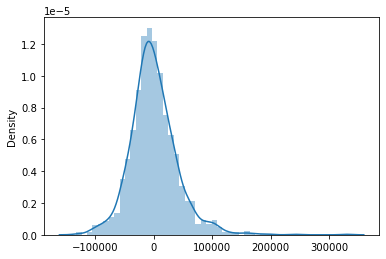

In [158]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

In [159]:
final_cols = X_train_rfe.columns.to_list()
final_cols

['MSZoning_FV',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition2_PosA',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'Exterior1st_BrkFace',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Wd Shng',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtExposure_Gd',
 'BsmtFinType1_Unf',
 'GarageType_BuiltIn',
 'GarageCond_Fa',
 'SaleType_Con']

In [166]:
X_train_rfe.shape

(1407, 22)

In [135]:
# Prediction and evaluation on test set
df_test = pd.read_csv("test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [136]:
# Null value analysis
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [137]:
missing_data = df_test.isnull().sum()[df_test.isnull().sum()>0]

In [138]:
df_test_null = pd.DataFrame(missing_data, columns = ["Null_count"]).reset_index()
pd.DataFrame.rename(df_test_null, columns={'index':'column_name'}, inplace = True)
df_test_null["Percent_null"]= df_test_null.Null_count*100/df.shape[0]
df_test_null.sort_values(by="Percent_null", ascending = False)

,column_name,Null_count,Percent_null
29,PoolQC,1456,103.482587
31,MiscFeature,1408,100.071073
2,Alley,1352,96.090974
30,Fence,1169,83.084577
21,FireplaceQu,730,51.883440
1,LotFrontage,227,16.133618
28,GarageCond,78,5.543710
23,GarageYrBlt,78,5.543710
27,GarageQual,78,5.543710
24,GarageFinish,78,5.543710


In [139]:
# delete those columns with greater than 30 % null values
delete_cols = df_test_null[df_test_null["Percent_null"]>30].column_name.tolist()
delete_cols

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [140]:
df_test.drop(delete_cols, axis =1, inplace = True)

In [141]:
# Null vaule imputation
#1. LotFrontage
df_test.LotFrontage = df_test.LotFrontage.fillna(df_test.LotFrontage.mode()[0])

In [142]:
df_test.LotFrontage.isnull().sum()

0

In [143]:
# Null value imputation
null_cols = df_test_null[df_test_null["Percent_null"]<10].column_name.tolist()
null_cols

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [144]:
def null_imputation(lst):
    for i in lst:
        df_test[i] = df_test[i].fillna(df_test[i].mode()[0])

In [145]:
null_imputation(null_cols)

In [146]:
(df_test.isnull().sum()).sum()

0

In [147]:
# drop id column
df_test.drop("Id",axis =1, inplace = True)

In [148]:
dummy_var_list1 = df_test.select_dtypes(exclude = ["int64","float64"]).columns

In [149]:
len(dummy_var_list1)

38

In [150]:
# Create dummy variables
dummy_list = pd.get_dummies(df_test[dummy_var_list1],drop_first = True)
dummy_list.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [151]:
# drop dummy vars
df_test.drop(dummy_var_list,axis =1, inplace = True)
df_test.shape

(1459, 38)

In [154]:
df_test = pd.concat([df_test,dummy_list], axis =1)
df_test.shape

(1459, 218)

In [160]:
X_test = df_test[final_cols]

In [167]:
X_test.shape

(1459, 22)

In [175]:
X_test_sm = sm.add_constant(X_test)

In [176]:
y_test_pred = mlr_model12.predict(X_test_sm)

In [183]:
submission = pd.DataFrame(y_test_pred, columns=["SalePrice"])

In [187]:
submission.reset_index(level = 0,inplace = True)

In [192]:
submission = submission.rename(columns={"index":"Id"})

In [193]:
submission.to_csv("Advanced House Price Prediction1.csv", index = False)